In [27]:
import bilby
import lal
import lalsimulation as lalsim
import numpy as np
import matplotlib.pyplot as plt

bilby.core.utils.setup_logger(outdir=".", label="run_label", log_level="WARNING")
# Define basic parameters for waveform generation
mass_1 = 30  # Mass of the primary black hole in solar masses
mass_2 = 25  # Mass of the secondary black hole in solar masses
luminosity_distance = 400  # Luminosity distance in Mpc
a_1 = 0.  # Spin magnitude of the primary black hole
a_2 = 0.  # Spin magnitude of the secondary black hole
tilt_1 = 0.0  # Tilt angle of the primary spin (radians)
tilt_2 = 0.0  # Tilt angle of the secondary spin (radians)
phi_12 = 0.0  # Angle between spin vectors (radians)
phi_jl = 0.0  # Angle between total angular momentum and orbital angular momentum (radians)
theta_jn = 0.4  # Angle between total angular momentum and line of sight (radians)
psi = 2.659  # Polarization angle (radians)
phase = 1.3  # Phase at coalescence (radians)
ra = 1.375  # Right ascension of the source
dec = -1.2108  # Declination of the source
geocent_time = 1126259642.413  # GPS time at coalescence

# Set up waveform arguments
waveform_arguments = {
    "waveform_approximant": "SEOBNRv4EHM",
    "reference_frequency": 50.0,
    "minimum_frequency": 20.0,
}

# Create the waveform generator using bilby's utility function
waveform_generator = bilby.gw.WaveformGenerator(
    duration=10,
    sampling_frequency=4048,
    frequency_domain_source_model=bilby.gw.source.lal_binary_black_hole,
    parameter_conversion=bilby.gw.conversion.convert_to_lal_binary_black_hole_parameters,
    waveform_arguments=waveform_arguments,
)

# Define interferometers (only Hanford in this case)
interferometers = bilby.gw.detector.InterferometerList(["H1"])
interferometers.set_strain_data_from_zero_noise(
    sampling_frequency=4048, duration=10, start_time=geocent_time - 2
)

# Inject a signal into the interferometer data
injection_parameters = dict(
    mass_1=mass_1,
    mass_2=mass_2,
    luminosity_distance=luminosity_distance,
    a_1=a_1,
    a_2=a_2,
    tilt_1=tilt_1,
    tilt_2=tilt_2,
    phi_12=phi_12,
    phi_jl=phi_jl,
    theta_jn=theta_jn,
    psi=psi,
    phase=phase,
    ra=ra,
    dec=dec,
    geocent_time=geocent_time,
    eccentricity=0.5,
)

h = interferometers.inject_signal(
    waveform_generator=waveform_generator, parameters=injection_parameters
)



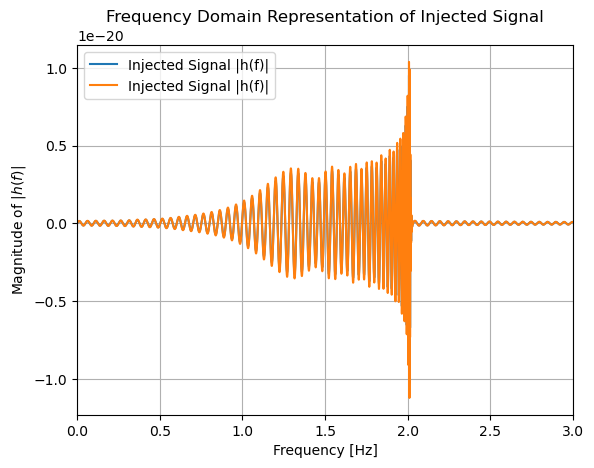

In [37]:

# Inject a signal into the interferometer data
injection_parameters = dict(
    mass_1=mass_1,
    mass_2=mass_2,
    luminosity_distance=luminosity_distance,
    a_1=a_1,
    a_2=a_2,
    tilt_1=tilt_1,
    tilt_2=tilt_2,
    phi_12=phi_12,
    phi_jl=phi_jl,
    theta_jn=theta_jn,
    psi=psi,
    phase=phase,
    ra=ra,
    dec=dec,
    geocent_time=geocent_time,
    eccentricity=1,
)

h = interferometers.inject_signal(
    waveform_generator=waveform_generator, parameters=injection_parameters
)
t = interferometers[0].strain_data.time_array
ht = interferometers[0].strain_data.time_domain_strain
plt.plot(t-t[0], ht, label="Injected Signal |h(f)|")

injection_parameters['eccentricity'] = 0
h = interferometers.inject_signal(
    waveform_generator=waveform_generator, parameters=injection_parameters
)
t = interferometers[0].strain_data.time_array
ht = interferometers[0].strain_data.time_domain_strain
plt.plot(t-t[0], ht, label="Injected Signal |h(f)|")




plt.xlabel("Frequency [Hz]")
plt.ylabel("Magnitude of $|h(f)|$")
plt.title("Frequency Domain Representation of Injected Signal")
# plt.yscale("log")  # Log scale for better visibility of strain amplitude
plt.xlim(0, 3)  # Typically, we are interested in this frequency range
plt.legend()
plt.grid()
plt.show()